<a href="https://colab.research.google.com/github/kayiwa/SBU_Data_Mining/blob/main/collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# this is dangerous but will do
data= pd.read_csv("https://raw.githubusercontent.com/kayiwa/SBU_Data_Mining/main/atlassian-confluence.csv")
# print the result
data

,"2021-10-14 10:54:35,678","""ERROR""","""ERROR"".1"
0,"2021-10-14 10:56:52,560","""INFO""","""STATEMENT"""
1,"2021-10-14 10:56:57,793","""INFO""","""STATEMENT"""
2,"2021-10-14 10:57:01,281","""INFO""","""STATEMENT"""
3,"2021-10-14 10:57:13,993","""INFO""","""STATEMENT"""
4,"2021-10-14 10:57:14,212","""INFO""","""STATEMENT"""
...,...,...,...
623,"2021-10-15 13:01:38,071","""INFO""","""STATEMENT"""
624,"2021-10-15 13:01:38,176","""INFO""","""STATEMENT"""
625,"2021-10-15 13:02:50,495","""INFO""","""STATEMENT"""
626,"2021-10-15 13:09:05,897","""ERROR""","""ERROR"""


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   2021-10-14 10:54:35,678  628 non-null    object
 1    "ERROR"                 628 non-null    object
 2    "ERROR".1               628 non-null    object
dtypes: object(3)
memory usage: 14.8+ KB


In [28]:
# give the columns headings
data.columns = ["Datetime", "error_label", "redacted_postgres"]
data

,Datetime,error_label,redacted_postgres
0,"2021-10-14 10:56:52,560","""INFO""","""STATEMENT"""
1,"2021-10-14 10:56:57,793","""INFO""","""STATEMENT"""
2,"2021-10-14 10:57:01,281","""INFO""","""STATEMENT"""
3,"2021-10-14 10:57:13,993","""INFO""","""STATEMENT"""
4,"2021-10-14 10:57:14,212","""INFO""","""STATEMENT"""
...,...,...,...
623,"2021-10-15 13:01:38,071","""INFO""","""STATEMENT"""
624,"2021-10-15 13:01:38,176","""INFO""","""STATEMENT"""
625,"2021-10-15 13:02:50,495","""INFO""","""STATEMENT"""
626,"2021-10-15 13:09:05,897","""ERROR""","""ERROR"""


In [29]:
# unstringify the Date time column
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           628 non-null    datetime64[ns]
 1   error_label        628 non-null    object        
 2   redacted_postgres  628 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 14.8+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder

In [30]:
data.head

<bound method NDFrame.head of                    Datetime error_label redacted_postgres
0   2021-10-14 10:56:52.560      "INFO"       "STATEMENT"
1   2021-10-14 10:56:57.793      "INFO"       "STATEMENT"
2   2021-10-14 10:57:01.281      "INFO"       "STATEMENT"
3   2021-10-14 10:57:13.993      "INFO"       "STATEMENT"
4   2021-10-14 10:57:14.212      "INFO"       "STATEMENT"
..                      ...         ...               ...
623 2021-10-15 13:01:38.071      "INFO"       "STATEMENT"
624 2021-10-15 13:01:38.176      "INFO"       "STATEMENT"
625 2021-10-15 13:02:50.495      "INFO"       "STATEMENT"
626 2021-10-15 13:09:05.897     "ERROR"           "ERROR"
627 2021-10-15 13:09:05.898     "ERROR"           "ERROR"

[628 rows x 3 columns]>

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           628 non-null    datetime64[ns]
 1   error_label        628 non-null    object        
 2   redacted_postgres  628 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 14.8+ KB


In [32]:
X = data[['Datetime', 'error_label']]
y = data['redacted_postgres']

In [35]:
X.shape

(628, 2)

In [36]:
X.columns

Index(['Datetime', 'error_label'], dtype='object')

In [37]:
from sklearn import preprocessing
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

,Datetime,error_label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3)

In [43]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [44]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.873015873015873


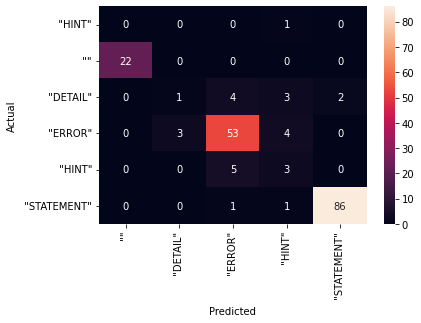

In [46]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [47]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.873015873015873
